In [1]:
import numpy as np
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
from scipy.stats import norm 
import pandas as pd

In [139]:
all_data = np.genfromtxt('data-nopvc-wm.txt', delimiter='')

In [140]:
all_data_ic = np.genfromtxt('data-nopvc.txt', delimiter='')

In [149]:
node = 4
data = all_data[node-1,:]
data_ic = all_data_ic[node-1,:]

(array([  5.,  13.,  49., 114., 166., 271., 276., 232., 146.,  73.,  55.,
         37.,  14.,  15.,  10.,   6.,   0.,   7.,   1.,   3.,   1.,   4.,
          0.,   2.,   6.,   1.,   1.,   3.,   0.,   0.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.,   0.,   0.,   1.]),
 array([0.81   , 0.85776, 0.90552, 0.95328, 1.00104, 1.0488 , 1.09656,
        1.14432, 1.19208, 1.23984, 1.2876 , 1.33536, 1.38312, 1.43088,
        1.47864, 1.5264 , 1.57416, 1.62192, 1.66968, 1.71744, 1.7652 ,
        1.81296, 1.86072, 1.90848, 1.95624, 2.004  , 2.05176, 2.09952,
        2.14728, 2.19504, 2.2428 , 2.29056, 2.33832, 2.38608, 2.43384,
        2.4816 , 2.52936, 2.57712, 2.62488, 2.67264, 2.7204 , 2.76816,
        2.81592, 2.86368, 2.91144, 2.9592 , 3.00696, 3.05472, 3.10248,
        3.15024, 3.198  ]),
 <BarContainer object of 50 artists>)

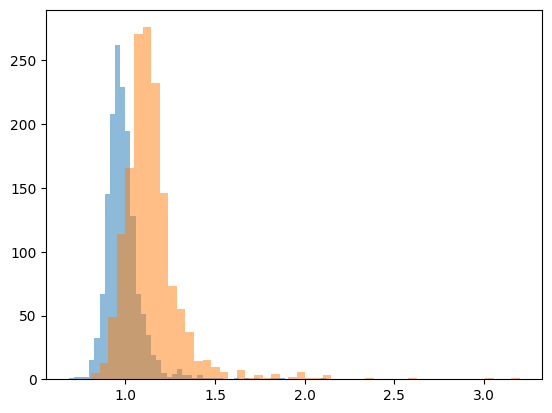

In [150]:
plt.hist(data, bins=50, alpha=0.5);
plt.hist(data_ic,bins=50, alpha=0.5)

In [151]:
model1 = GaussianMixture(n_components=1,random_state=123)
model1.fit(data.reshape(-1,1))

model2 = GaussianMixture(n_components=2,random_state=123)
model2.fit(data.reshape(-1,1))

GaussianMixture(n_components=2, random_state=123)

In [152]:
x_range = np.linspace(np.max(data), np.min(data), len(data));

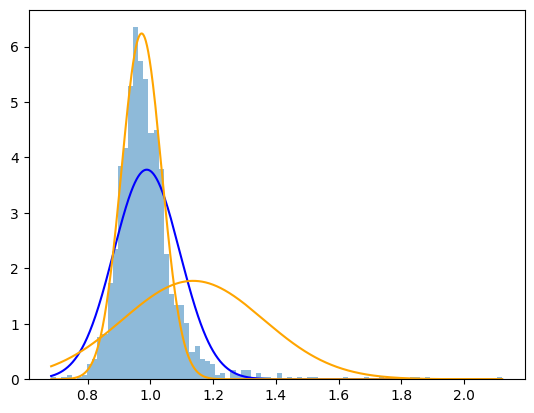

In [153]:
plt.hist(data, bins='auto', density=True, histtype='stepfilled', alpha=0.5)
plt.plot(x_range, norm.pdf(x_range, model1.means_[0][0], np.sqrt(model1.covariances_[0][0][0])), color="blue")
plt.plot(x_range, norm.pdf(x_range, model2.means_[0][0], np.sqrt(model2.covariances_[0][0][0])), color="orange")
plt.plot(x_range, norm.pdf(x_range, model2.means_[1][0], np.sqrt(model2.covariances_[1][0][0])), color="orange")


In [154]:
model2.predict_proba(np.array([data.min()]).reshape(-1, 1))

array([[0.99069669, 0.00930331]])

In [155]:
mean_1, mean_2 =  model2.means_[0][0], model2.means_[1][0]
print([mean_1, mean_2])


[1.1363798733253934, 0.9723185447517902]


In [158]:
var_1, var_2 = model2.covariances_[0][0][0], model2.covariances_[1][0][0]
print([var_1, var_2])


[0.050519292381857914, 0.004092384270977766]


In [123]:
vals = np.arange(1, 2, 0.001).reshape(-1,1)
probs = model2.predict_proba(vals)
argprob = next(filter( lambda x: probs[x][1] > 0.5, np.arange(0, len(probs),1)))
vals[argprob]

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72])

In [124]:
df =  pd.DataFrame(columns = ["region","C0_mean","C1_mean","C0_cov","C1_cov"])

In [125]:
for i in np.arange(0, 72):
    data = all_data[i,:]

    model1 = GaussianMixture(n_components=1,random_state=123)
    model1.fit(data.reshape(-1,1))

    model2 = GaussianMixture(n_components=2,random_state=123)
    model2.fit(data.reshape(-1,1))

    aic1 = model1.aic(data.reshape(-1,1))
    aic2 = model2.aic(data.reshape(-1,1)) 
    if aic1 > aic2: 
        mean_1, mean_2 =  model2.means_[0][0], model2.means_[1][0]
        var_1, var_2 = model2.covariances_[0][0][0], model2.covariances_[1][0][0]
        if mean_1 < mean_2:
            df.loc[i] = [int(i+1), mean_1, mean_2, var_1, var_2]
        elif mean_2 < mean_1:
            df.loc[i] = [int(i+1), mean_2, mean_1, var_2, var_1]


In [126]:
df

,region,C0_mean,C1_mean,C0_cov,C1_cov
0,1.0,1.011217,1.782768,0.019441,0.273888
1,2.0,1.069156,1.783990,0.022040,0.517826
2,3.0,1.093468,1.786984,0.027470,0.714341
3,4.0,0.966504,1.497854,0.019921,0.307469
4,5.0,1.022779,1.867765,0.020130,0.283286
...,...,...,...,...,...
67,68.0,1.009932,1.803546,0.019353,0.486243
68,69.0,0.809607,0.821872,0.015464,0.061339
69,70.0,0.959125,1.234484,0.011784,0.091484
70,71.0,1.026022,1.317381,0.013883,0.044044


In [127]:
df.to_csv("wm-pvc-moments.csv")